In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').
# EDA
- Load the data.
- Look at the median_house_value variable. Does it have a long tail?

# Features
## For the rest of the homework, you'll need to use only these columns:
- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'
## Select only them.

In [214]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [215]:
select_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
                  'households', 'median_income', 'median_house_value']
df = df[select_columns]
df.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


,A,B,C,x,y,z
0,10.0,20.0,30.0,NaN,NaN,NaN
1,NaN,NaN,NaN,100.0,200.0,300.0


# Question 1
## Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [216]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
## What's the median (50% percentile) for variable 'population'?

- 1133
- 1122
- 1166
- 1188



In [217]:
df.population.median()

1166.0

Split the data
Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('median_house_value') is not in your dataframe.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [218]:
# # Mini example for check shuffle split
# example = np.arange(1,7)
# np.random.seed(42)
# display(example)
# l = len(example)
# display(l)
# ttest = int(l*0.2)
# tval = int(l*0.2)
# ttrain = l - ttest - tval
# # ttrain, ttest, tval out (4, 1, 1)
# ilx = np.arange(l)
# np.random.shuffle(ilx)
# ilx[:ttrain], ilx[ttrain:ttrain+tval], ilx[ttrain+tval:]
# # out
# # array([1, 2, 3, 4, 5, 6])
# # 6
# # (array([0, 1, 5, 2]), array([4]), array([3]))

In [219]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [220]:
n_train, n_val, n_test

(12384, 4128, 4128)

In [222]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val:]].copy()
# reset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [225]:
train_target = df_train['median_house_value'].values
val_target = df_val['median_house_value'].values
test_target = df_test['median_house_value'].values

y_train = np.log1p(train_target)
y_val = np.log1p(val_target)
y_test = np.log1p(test_target)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?
# Options:

With 0
With mean
Both are equally good

In [226]:
df_train.info()  # we have all feature Dtype float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            12384 non-null  float64
 1   longitude           12384 non-null  float64
 2   housing_median_age  12384 non-null  float64
 3   total_rooms         12384 non-null  float64
 4   total_bedrooms      12177 non-null  float64
 5   population          12384 non-null  float64
 6   households          12384 non-null  float64
 7   median_income       12384 non-null  float64
dtypes: float64(8)
memory usage: 774.1 KB


In [227]:
# Let's output columns where there are missing values
val_miss = df_train.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].index[0]
val_miss

'total_bedrooms'

In [243]:
#@ PREPARING THE DATASET:
def miss_zero(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X


def miss_mean(df, df_train=df_train):
    try:
        val_miss = df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].index[0]
        df = df.copy()
        for i in val_miss:
            mean_val = df_train[val_miss].mean() # we must take only out df_train!!!
            df = df.fillna(mean_val)
        X = df.values
        return X
    except:
        X = df.values
        return X

In [244]:
X_train_0 = miss_zero(df_train)
X_val_0 = miss_zero(df_val)
X_test_0 = miss_zero(df_test)

In [245]:
np.isnan(X_train_0).sum()

0

## RMSE

In [246]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## train_linear_regression

In [247]:
#@ FUNCTION FOR LINEAR REGRESSION:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [248]:
w0, w = train_linear_regression(X_train_0, y_train)

y_pred_0 = w0 + X_val_0.dot(w)
round(rmse(y_val, y_pred_0), 2)

0.33

<AxesSubplot:ylabel='Count'>

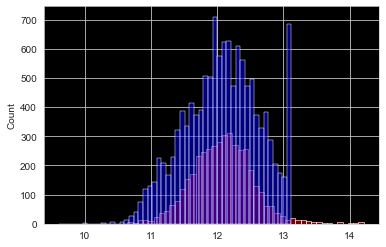

In [249]:
sns.set_style({'axes.facecolor': '0'})
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [250]:
X_train_mean = miss_mean(df_train)
X_val_mean = miss_mean(df_val)
X_test_mean = miss_mean(df_test)

In [251]:
w0, w = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0 + X_val_mean.dot(w)
round(rmse(y_val, y_pred_mean), 2)

0.33

<AxesSubplot:ylabel='Count'>

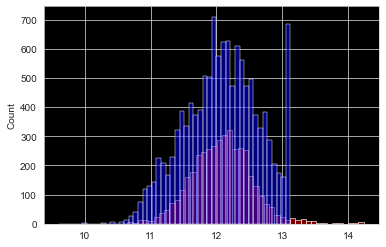

In [253]:
sns.set_style({'axes.facecolor': '0'})
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [254]:
round(rmse(y_val, y_pred_0), 2), round(rmse(y_val, y_pred_mean), 2)

(0.33, 0.33)

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
If there are multiple options, select the smallest r.

## Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [255]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [262]:
data = [{'A': 10, 'B': 20, 'C':30}, {'x':100, 'y': 200, 'z': 300}]
df = pd.DataFrame(data)
df

,A,B,C,x,y,z
0,10.0,20.0,30.0,NaN,NaN,NaN
1,NaN,NaN,NaN,100.0,200.0,300.0


In [264]:
reg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
list_score = []
for r in reg:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    y_pred_0_r = w0 + X_val_0.dot(w)
    score = round(rmse(y_val, y_pred_0_r), 2)
    list_score.append({'r': r, 'w0': w0, 'score': score})

In [266]:
data_score = pd.DataFrame(list_score)
data_score

,r,w0,score
0,0.000000,-11.686975,0.33
1,0.000001,-11.686959,0.33
2,0.000100,-11.685369,0.33
3,0.001000,-11.670931,0.33
4,0.010000,-11.528494,0.33
5,0.100000,-10.274500,0.33
6,1.000000,-4.920481,0.33
7,5.000000,-1.482096,0.34
8,10.000000,-0.789931,0.34


In [267]:
optional = [0, 0.000001, 0.001, 0.0001]
data_score.loc[data_score['r'].isin(optional)]

,r,w0,score
0,0.000000,-11.686975,0.33
1,0.000001,-11.686959,0.33
2,0.000100,-11.685369,0.33
3,0.001000,-11.670931,0.33


# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.
## Options:

- 0.16
- 0.00005
- 0.005
- 0.15555

In [269]:
def train_test_split(df, test_split=0.2, val_split=0.2, random_seed=42):
    n = len(df)
    n_val = int(n * val_split)
    n_test = int(n * test_split)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train + n_val]].copy()
    df_test = df.iloc[idx[n_train + n_val:]].copy()
    # reset indexes
    X_train = df_train.reset_index(drop=True)
    X_val = df_val.reset_index(drop=True)
    X_test = df_test.reset_index(drop=True)

    # y
    train_target = df_train['median_house_value'].values
    val_target = df_val['median_house_value'].values
    test_target = df_test['median_house_value'].values

    y_train = np.log1p(train_target)
    y_val = np.log1p(val_target)
    y_test = np.log1p(test_target)

    del X_train['median_house_value']
    del X_val['median_house_value']
    del X_test['median_house_value']
    X_train = miss_zero(df_train)
    X_val = miss_zero(df_val)
    X_test = miss_zero(df_test)

    return X_train, y_train, X_val, y_val,  X_test, y_test

In [277]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
select_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
                  'households', 'median_income', 'median_house_value']
df = df[select_columns]

In [279]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []
for seed in seed_list:
    X_train, y_train, X_val,y_val,  X_test,  y_test = train_test_split(df, test_split=0.2, val_split=0.2, random_seed=seed)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    RMSE = round(rmse(y_val, y_pred), 2)
    rmse_list.append({'seed': seed, 'RMSE': RMSE})

RMSE_DF = pd.DataFrame(rmse_list)
RMSE_DF

,seed,RMSE
0,0,0.17
1,1,0.16
2,2,0.16
3,3,0.17
4,4,0.17
5,5,0.17
6,6,0.16
7,7,0.16
8,8,0.17
9,9,0.17


In [281]:
round(np.std(RMSE_DF['RMSE']), 3)

0.005

# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?
- Options:

- 0.35
- 0.135
- 0.450
- 0.245

In [307]:
reg = [0.35, 0.135, 0.450, 0.245, 0.001]
seed = [9]
rmse_list = []
for r in reg:
    X_train, y_train, X_val,y_val,  X_test,  y_test = train_test_split(df, test_split=0.2, val_split=0.2, random_seed=seed)
    X_train = np.vstack([X_train, X_val])
    y_train = np.hstack([y_train, y_val])

    w0, w = w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_test.dot(w)
    RMSE = round(rmse(y_test, y_pred), 2)
    rmse_list.append({'r': r, 'RMSE': RMSE})

RMSE_DF = pd.DataFrame(rmse_list)
RMSE_DF

,r,RMSE
0,0.350,0.16
1,0.135,0.16
2,0.450,0.16
3,0.245,0.16
4,0.001,0.16


In [308]:
np.hstack([y_train, y_val]).shape # I have not questions, but it work.

(20640,)

In [311]:
np.vstack([X_train, X_val]).shape

(20640, 9)